# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(0)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [187]:
parameters = {
    "q": cities[0],
    "appid": weather_api_key
}

response = requests.get(url="https://api.openweathermap.org/data/2.5/weather?", params=parameters)
results=response.json()
city_weather = results["weather"][0]["main"]
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = results["coord"]["lat"]
city_lng = results["coord"]["lon"]
city_max_temp = results["main"]["temp_max"]-273.15
city_humidity = results["main"]["humidity"]
city_clouds = results["clouds"]["all"]
city_wind = results["wind"]["speed"]
city_country = results["sys"]["country"]
city_date = results["dt"]

{'coord': {'lon': -15.8333, 'lat': 11.2833},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 297.58,
  'feels_like': 297.49,
  'temp_min': 297.58,
  'temp_max': 297.58,
  'pressure': 1011,
  'humidity': 54,
  'sea_level': 1011,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 6.87, 'deg': 337, 'gust': 7.87},
 'clouds': {'all': 100},
 'dt': 1675655109,
 'sys': {'country': 'GW', 'sunrise': 1675668404, 'sunset': 1675710484},
 'timezone': 0,
 'id': 2374583,
 'name': 'Bubaque',
 'cod': 200}

In [188]:
# Set the API base URL
url="https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    parameters = {
    "q": cities[i],
    "appid": weather_api_key
    }
    
    response = requests.get(url="https://api.openweathermap.org/data/2.5/weather?", params=parameters)
    results=response.json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = results["weather"][0]["main"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = results["coord"]["lat"]
        city_lng = results["coord"]["lon"]
        city_max_temp = results["main"]["temp_max"]
        city_humidity = results["main"]["humidity"]
        city_clouds = results["clouds"]["all"]
        city_wind = results["wind"]["speed"]
        city_country = results["sys"]["country"]
        city_date = results["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | lushunkou
City not found. Skipping...
Processing Record 3 of Set 1 | arcelia
Processing Record 4 of Set 1 | wenchi
Processing Record 5 of Set 1 | samarai
Processing Record 6 of Set 1 | iranshahr
Processing Record 7 of Set 1 | kawalu
Processing Record 8 of Set 1 | tromso
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | chiredzi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | vanavara
Processing Record 19 of Set 1 | sept-iles
Processing Record 20 of Set 1 | komsomolskiy
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...

Processing Record 35 of Set 4 | kastoria
Processing Record 36 of Set 4 | abay
Processing Record 37 of Set 4 | anqing
Processing Record 38 of Set 4 | onega
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | muroto
Processing Record 41 of Set 4 | methoni
Processing Record 42 of Set 4 | rotterdam
Processing Record 43 of Set 4 | nagato
Processing Record 44 of Set 4 | alihe
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | atuona
Processing Record 48 of Set 4 | krasnoarmeysk
Processing Record 49 of Set 4 | axim
Processing Record 0 of Set 5 | richards bay
Processing Record 1 of Set 5 | ixtapa
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | bonthe
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | algodones
Processing Record 6 of Set 5 | poum
Processing Record 7 of Set 5 | seguela
Processing Record 8 of Set 5 | alta floresta
Process

Processing Record 24 of Set 8 | brae
Processing Record 25 of Set 8 | chumikan
Processing Record 26 of Set 8 | kidal
Processing Record 27 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 28 of Set 8 | constitucion
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | kindu
Processing Record 31 of Set 8 | wakuya
Processing Record 32 of Set 8 | fare
Processing Record 33 of Set 8 | kovernino
Processing Record 34 of Set 8 | katobu
Processing Record 35 of Set 8 | coos bay
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | yankton
Processing Record 39 of Set 8 | collierville
Processing Record 40 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 8 | utiroa
City not found. Skipping...
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | ilhabela
Processing Record 44 of Set 8 | nara
Processing Record 45 of Set 8 | mehamn


Processing Record 13 of Set 12 | darhan
Processing Record 14 of Set 12 | bijar
Processing Record 15 of Set 12 | faanui
Processing Record 16 of Set 12 | sai buri
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | ailigandi
Processing Record 19 of Set 12 | upleta
Processing Record 20 of Set 12 | santa maria
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | brookhaven
Processing Record 23 of Set 12 | banmankhi
Processing Record 24 of Set 12 | tezu
Processing Record 25 of Set 12 | stanesti
Processing Record 26 of Set 12 | alofi
Processing Record 27 of Set 12 | coihueco
Processing Record 28 of Set 12 | tidore
City not found. Skipping...
Processing Record 29 of Set 12 | jiroft
City not found. Skipping...
Processing Record 30 of Set 12 | roquetas de mar
Processing Record 31 of Set 12 | kachikau
City not found. Skipping...
Processing Record 32 of Set 12 | salisbury
Processing Record 33 of Set 12 | kizilskoye
Processing Record 34 of Set 12 | vreed e

In [195]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# convert the kelvin to celcius
city_data_df["Max Temp"]=city_data_df["Max Temp"]-273.15

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [196]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.2833,-15.8333,24.43,54,100,6.87,GW,1675655109
1,arcelia,18.2833,-100.2667,24.14,37,0,1.46,MX,1675655452
2,wenchi,7.7392,-2.1046,23.51,77,84,1.81,GH,1675655452
3,samarai,-10.6167,150.6667,27.40,83,99,5.80,PG,1675655453
4,iranshahr,27.2025,60.6848,12.19,71,0,2.06,IR,1675655453


In [197]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv")

In [198]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bubaque,11.2833,-15.8333,24.43,54,100,6.87,GW,1675655109
1,1,arcelia,18.2833,-100.2667,24.14,37,0,1.46,MX,1675655452
2,2,wenchi,7.7392,-2.1046,23.51,77,84,1.81,GH,1675655452
3,3,samarai,-10.6167,150.6667,27.40,83,99,5.80,PG,1675655453
4,4,iranshahr,27.2025,60.6848,12.19,71,0,2.06,IR,1675655453


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

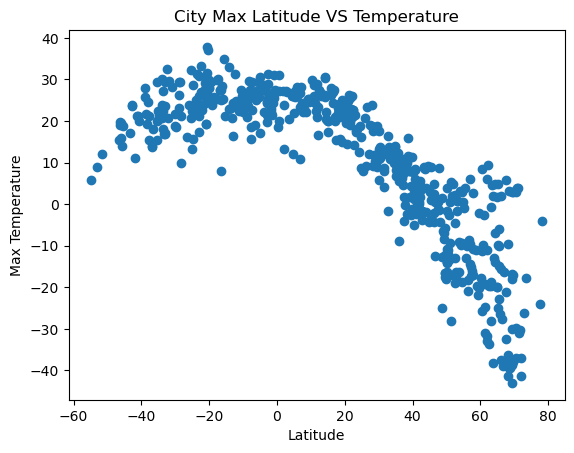

In [199]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"]) 

# Incorporate the other graph properties
plt.ylabel("Max Temperature")
plt.title("City Max Latitude VS Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

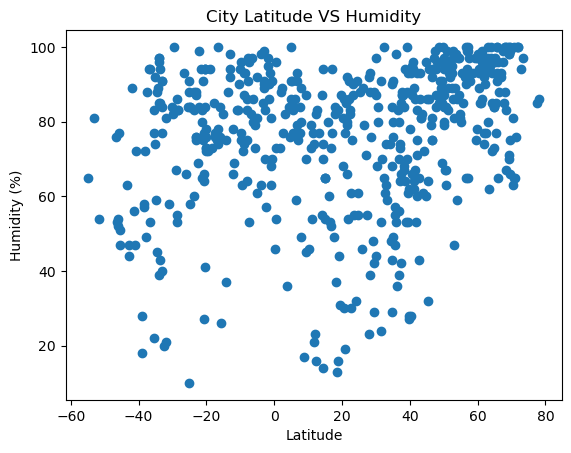

In [200]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"]) 

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.title("City Latitude VS Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

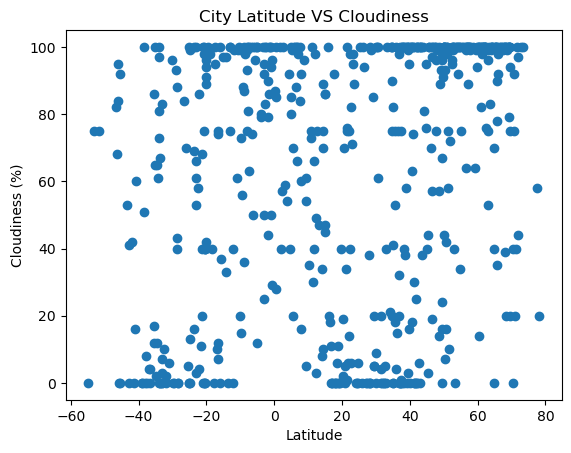

In [201]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"]) 


# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS Cloudiness")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

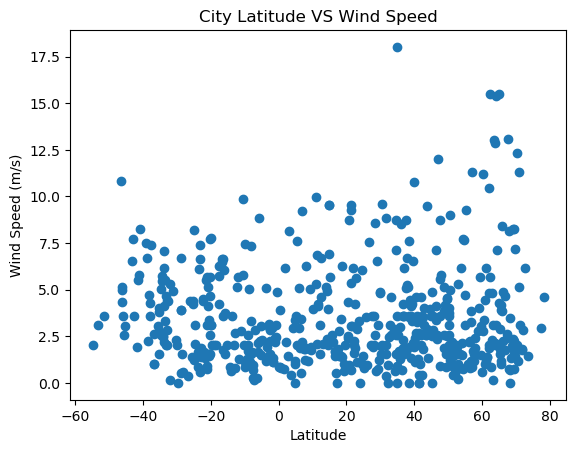

In [202]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"]) 

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude VS Wind Speed")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [239]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_function(x,y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.scatter(x, y)
    #add trendline to plot
    plt.plot(x, p(x),color="red")
    formula="Y = "+str(round(z[0],2))+"X" +" + "+str(round(z[1],2))
    plt.text(x.median(),y.median(),formula, fontsize = 15,color="red")
    result = linregress(x, y)
    print(f"R-squared: {result.rvalue**2:.6f}")

In [205]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bubaque,11.2833,-15.8333,24.43,54,100,6.87,GW,1675655109
1,1,arcelia,18.2833,-100.2667,24.14,37,0,1.46,MX,1675655452
2,2,wenchi,7.7392,-2.1046,23.51,77,84,1.81,GH,1675655452
4,4,iranshahr,27.2025,60.6848,12.19,71,0,2.06,IR,1675655453
6,6,tromso,69.6496,18.9570,3.01,75,75,7.20,NO,1675655454


In [206]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,3,samarai,-10.6167,150.6667,27.40,83,99,5.80,PG,1675655453
5,5,kawalu,-7.3817,108.2082,29.37,53,100,0.17,ID,1675655454
8,8,chiredzi,-21.0500,31.6667,19.29,75,0,0.90,ZW,1675655455
13,13,ushuaia,-54.8000,-68.3000,5.81,65,0,2.06,AR,1675655457
14,14,busselton,-33.6500,115.3333,27.16,43,0,5.50,AU,1675655458


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.744149


Text(0.5, 0, 'Latitude')

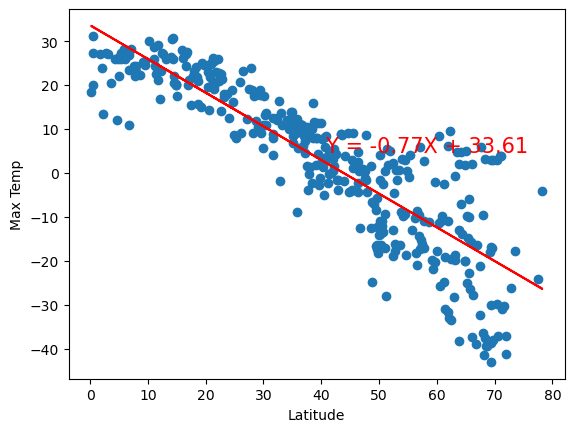

In [254]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
linear_function(x, y)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

R-squared: 0.171589


Text(0.5, 0, 'Latitude')

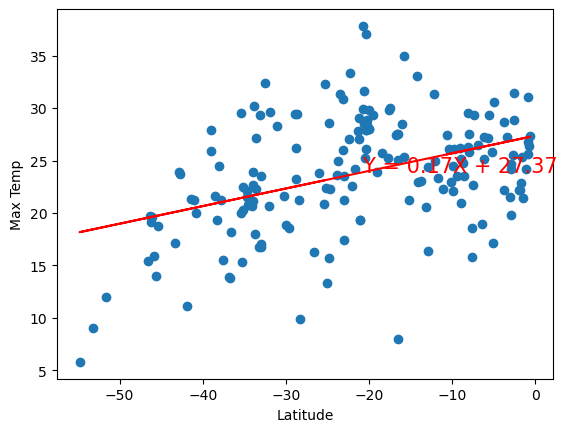

In [253]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
linear_function(x, y)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 
Based on the Linear regression plot and the R-squared values the max- temp and latitued has a 
stronger linear relashion in the Nothern Hemisphere, 1 unit latitued increase can decrease max temperature by 0.8242 
units on average. 

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.160321


Text(0.5, 0, 'Latitude')

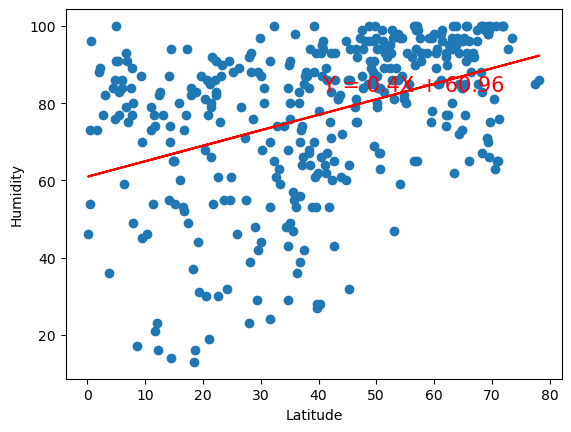

In [252]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
linear_function(x, y)
plt.ylabel("Humidity")
plt.xlabel("Latitude")


R-squared: 0.121684


Text(0.5, 0, 'Latitude')

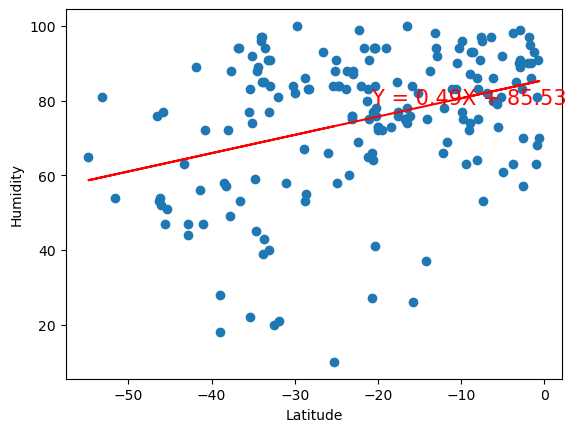

In [251]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
linear_function(x, y)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 
Humidity vs. Latitude Linear Regression Plot for the Nothern Hemisphere and Southern Hemisphere show no significant 
relation.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.087503


Text(0.5, 0, 'Latitude')

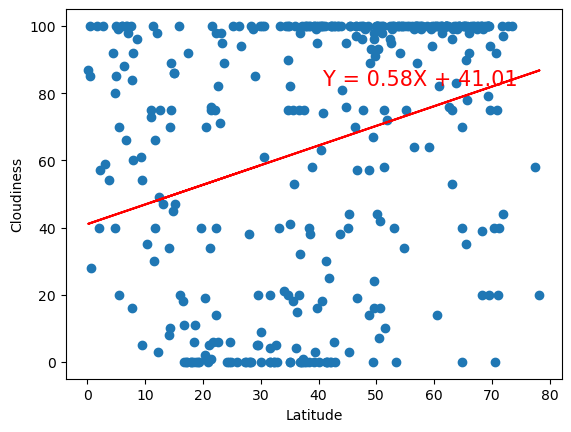

In [255]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
linear_function(x, y)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

R-squared: 0.152432


Text(0.5, 0, 'Latitude')

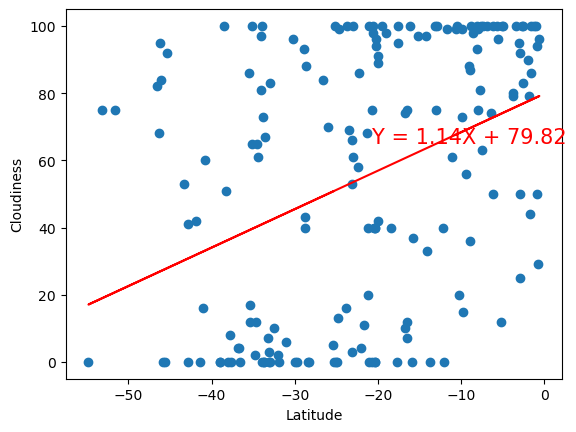

In [256]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
linear_function(x, y)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 
The Northern Hemisphere shows R-squared: 0.059028 and Southern Hemisphere show R-squared: 0.152557

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.006625


Text(0.5, 0, 'Latitude')

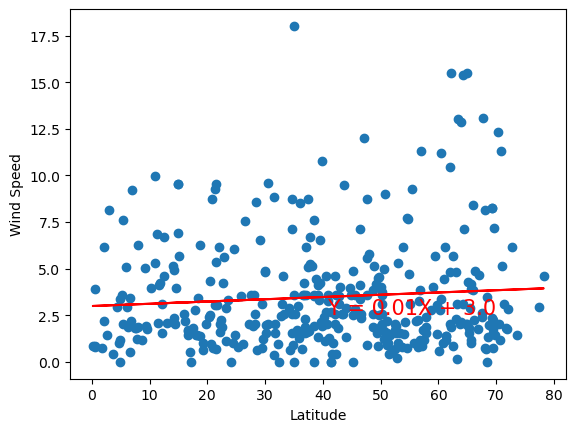

In [257]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
linear_function(x, y)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

R-squared: 0.071428


Text(0.5, 0, 'Latitude')

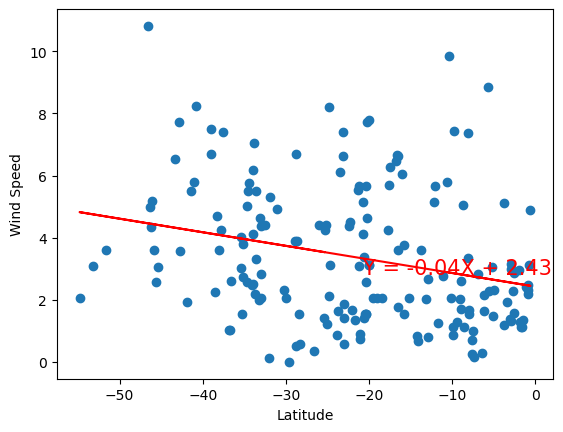

In [260]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
linear_function(x, y)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

The Nothern Hemisphere shows R-squared: 0.001183 and Southern Hemisphere show R-squared: 0.188577